This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [48]:
# (a)
# data preprocessing
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
data=pd.read_csv("C:/CMU_SEM1/ML_AI/24787-hw4-handout/24787-hw4-handout/q2-data/data.csv",header=None)
m=len(data.columns)/2
data1=data.drop(data.index[0])
for i in range(20):
    globals()['df%s' % i] = data1.iloc[:,2*i:2*(i+1)]
DF1=np.vstack((df0,df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19))
x1=['TRP','ALA','TYR','PRO','HIS','THR','GLY','SER','CYS','PHE','ASP','GLU','ISO','MET','LEU','VAL','ASN','GLN' ,'ARG' ,'LYS']
DF2=np.repeat(x1,100)
DF=  np.column_stack([DF1,DF2])
DF[:,2] = pd.factorize(DF[:,2])[0]
DF[:,2] = pd.Categorical(pd.factorize(DF[:,2])[0])
DF[:,1] = DF[:,1].astype(float)  
DF[:,0] = DF[:,0].astype(float) 
DF[:,2] = DF[:,2].astype(int)  
X_train, X_test, y_train, y_test = train_test_split(DF[:,0:2], DF[:,2], test_size=0.3, random_state=42)
y_test=y_test.astype(int) 
y_train=y_train.astype(int)
X_train=X_train.astype(float) 
X_test=X_test.astype(float) 
np.savetxt('data_final.csv', DF, delimiter=',')
print(DF)

[[1.46 2600.0 0]
 [21.6 2500.0 0]
 [12.6 3200.0 0]
 ...
 [73.067 1441.9 19]
 [71.311 1452.1 19]
 [70.91 1446.8 19]]


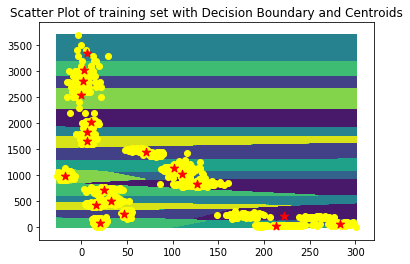

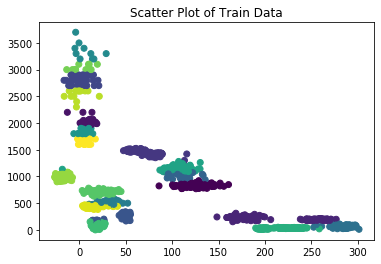

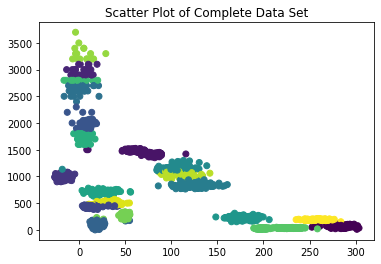

In [49]:
# (b)
# k-means
#Converting the labels to int
kmeans = KMeans(n_clusters=20)
kmeans.fit(X_train)
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,1), np.arange(y_min, y_max,1))
z=kmeans.predict(np.c_[xx.ravel(), yy.ravel()])    
Z = z.reshape(xx.shape)
#Scatter Plot with decision boundary and centroids
plt.contourf(xx,yy,Z)
plt.scatter(X_train[:,0],X_train[:,1], c='yellow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=75)
plt.title('Scatter Plot of training set with Decision Boundary and Centroids')
plt.show()
#Plot Using Only Training Data Set
plt.scatter(X_train[:,0],X_train[:,1], c=kmeans.labels_.astype(float))
plt.title('Scatter Plot of Train Data')
plt.show()
#Plot Using Entire Data
kmeans1 = KMeans(n_clusters=20)
kmeans1.fit(DF)
plt.scatter(DF[:,0],DF[:,1], c=kmeans1.labels_.astype(float))
plt.title('Scatter Plot of Complete Data Set')
plt.show()


C:\Users\mohan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of training set is :0.9985714285714286
The accuracy of test set is :0.9516666666666667


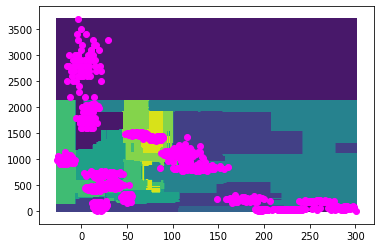

In [50]:
# (c)
# random forest
#Create a Gaussian Classifier
rfclass=RandomForestClassifier()
rfclass.fit(X_train, y_train)
Y_pred=rfclass.predict(X_test)
#Model Accuracy
trainscore=rfclass.score(X_train,y_train)
testscore=rfclass.score(X_test,y_test)
acctest=rfclass.score(X_test,y_test)
acctrain=rfclass.score(X_train,y_train)
print("The accuracy of training set is :"+str(acctrain))
print("The accuracy of test set is :"+str(acctest))

z1=rfclass.predict(np.c_[xx.ravel(), yy.ravel()])    
Z1 = z1.reshape(xx.shape)

plt.contourf(xx,yy,Z1)
plt.scatter(X_train[:,0],X_train[:,1], c='magenta')



n_estimaters= 1  Accuracy= 0.9316666666666666
n_estimaters= 2  Accuracy= 0.9166666666666666
n_estimaters= 3  Accuracy= 0.955
n_estimaters= 4  Accuracy= 0.9583333333333334
n_estimaters= 5  Accuracy= 0.9516666666666667
n_estimaters= 6  Accuracy= 0.9516666666666667
n_estimaters= 7  Accuracy= 0.9533333333333334
n_estimaters= 8  Accuracy= 0.9733333333333334
n_estimaters= 9  Accuracy= 0.9616666666666667
n_estimaters= 10  Accuracy= 0.96
n_estimaters= 11  Accuracy= 0.965
n_estimaters= 12  Accuracy= 0.9633333333333334
n_estimaters= 13  Accuracy= 0.9616666666666667
n_estimaters= 14  Accuracy= 0.96
n_estimaters= 15  Accuracy= 0.9583333333333334
n_estimaters= 16  Accuracy= 0.9633333333333334
n_estimaters= 17  Accuracy= 0.96
n_estimaters= 18  Accuracy= 0.9616666666666667
n_estimaters= 19  Accuracy= 0.9683333333333334
n_estimaters= 20  Accuracy= 0.97
n_estimaters= 21  Accuracy= 0.965
n_estimaters= 22  Accuracy= 0.965
n_estimaters= 23  Accuracy= 0.965
n_estimaters= 24  Accuracy= 0.9666666666666667
n_

Text(0, 0.5, 'Accuracy')

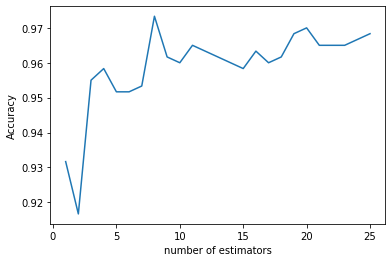

In [51]:
#Accuracy Vs number of estimators
test_acc_list=[]
for i in range(1,26,1):
    rfclass1=RandomForestClassifier(n_estimators=i)
    rfclass1.fit(X_train, y_train)
    Y_pred=rfclass1.predict(X_test)

    trainscore=rfclass1.score(X_train,y_train)
    testscore=rfclass1.score(X_test,y_test)
    test_acc=rfclass1.score(X_test,y_test)
    train_acc=rfclass1.score(X_train,y_train)
    test_acc_list.append(test_acc)
test_acc_list=np.array(test_acc_list)

for i in range(len(test_acc_list)): 
    print("n_estimaters=", i+1," Accuracy=",(test_acc_list[i]))
plt.plot((np.arange(1,26,1)),test_acc_list)
plt.xlabel('number of estimators')
plt.ylabel('Accuracy')

# (d)
# Analysis

Applying different machine learning algorithms to this dataset, we can see that:
1) For the same data, accuracy of the random forest increases with the number of estimators(trees), while K-Means do not have an accuracy associated with it.
2) The number of decision boundaries of K-means algorithm is greater than the random forest algorithm. 
3) For K- means decision boundaries is mainly dependant on X2 values than X1 values as they are almost parallel to the X1 values. The random forest has better clusters than K-means for this data-set. 

